<a href="https://colab.research.google.com/github/figure-2/First_PJT/blob/master/First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# 데이터 올리는 법 https://dkfl8151.tistory.com/4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2301_18 = pd.read_csv('/content/drive/MyDrive/test/생활이동_자치구_2023.01_18시.csv', encoding='euc_kr')
df_2301_19 = pd.read_csv('/content/drive/MyDrive/test/생활이동_자치구_2023.01_19시.csv', encoding='euc_kr')
df_2301_20 = pd.read_csv('/content/drive/MyDrive/test/생활이동_자치구_2023.01_20시.csv', encoding='euc_kr')

In [ ]:
df_all_2301 = pd.concat([df_2301_18, df_2301_19, df_2301_20], axis  = 0)

In [ ]:
df_all_2301.head(10)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202301,일,18,11010,11010,F,0,EE,29,555.57
1,202301,일,18,11010,11010,F,0,EH,24,193.67
2,202301,일,18,11010,11010,F,0,WH,11,27.58
3,202301,일,18,11010,11010,F,60,WH,23,200.39
4,202301,일,18,11010,11010,M,45,HW,24,34.55
5,202301,일,18,11010,11010,M,45,WE,21,37.94
6,202301,일,18,11010,11010,M,45,WH,33,201.01
7,202301,일,18,11010,11010,M,45,WW,19,56.99
8,202301,일,18,11010,11010,M,50,EE,94,991.47
9,202301,일,18,11010,11010,M,50,EH,41,361.56


In [ ]:
df_all_2301.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178896 entries, 0 to 1532408
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 434.6+ MB


In [ ]:
df_all_2301.describe()

,대상연월,도착시간,출발_시군구_코드,도착_시군구_코드,나이,평균_이동_시간(분)
count,520937.0,520937.000000,520937.000000,520937.000000,520937.000000,520937.000000
mean,202301.0,18.948545,11129.666774,11129.713459,39.494958,62.834370
std,0.0,0.808966,75.275253,73.784632,10.108727,37.989779
min,202301.0,18.000000,11010.000000,11010.000000,25.000000,1.000000
25%,202301.0,18.000000,11060.000000,11060.000000,30.000000,39.000000
50%,202301.0,19.000000,11130.000000,11130.000000,40.000000,57.000000
75%,202301.0,20.000000,11200.000000,11200.000000,50.000000,77.000000
max,202301.0,20.000000,11250.000000,11250.000000,55.000000,919.000000


In [ ]:
df_all_2301.isnull().sum()

대상연월           0
요일             0
도착시간           0
출발_시군구_코드      0
도착_시군구_코드      0
성별             0
나이             0
이동유형           0
평균_이동_시간(분)    0
이동인구(합)        0
dtype: int64

In [ ]:
df_all_2301[df_all_2301.duplicated(keep=False)]

,대상연월,요일,도착시간,출발_시군구_코드,도착_시군구_코드,성별,나이,이동유형,평균_이동_시간(분),이동인구(합)
999539,202301,목,20,11220,11180,F,40,WH,74,41.43
999542,202301,목,20,11220,11180,F,45,EW,61,3.36
999581,202301,목,20,11220,11200,F,25,EW,27,6.16
999584,202301,목,20,11220,11200,F,25,HW,84,4.10
999585,202301,목,20,11220,11200,F,25,WE,42,61.63
...,...,...,...,...,...,...,...,...,...,...
1001373,202301,목,20,11220,11230,F,30,EW,36,105.57
1001376,202301,목,20,11220,11230,F,30,HW,25,50.26
1001377,202301,목,20,11220,11230,F,30,WE,44,272.98
1001378,202301,목,20,11220,11230,F,30,WH,43,464.39


In [ ]:
df_all_2301 = df_all_2301.rename(columns={'출발 시군구 코드':'출발_시군구_코드',
                                '도착 시군구 코드':'도착_시군구_코드',
                                '평균 이동 시간(분)':'평균_이동_시간(분)'
})

# 전국 시군구 표준 코드
서울은 1로 시작  

https://jamdol.tistory.com/91

In [ ]:
df_all_2301.출발_시군구_코드.value_counts()

11230    28095
11020    26650
11010    25669
11220    25586
11190    25469
11140    24130
11030    23687
11040    23270
11240    22781
11060    21836
11130    21529
11080    20634
11050    20430
11160    20214
11210    20019
11170    19977
11200    19899
11110    17897
11250    17640
11180    17226
11070    17190
11120    16128
11150    15749
11090    15723
11100    13509
Name: 출발_시군구_코드, dtype: int64

In [ ]:
df_all_2301 = df_all_2301[(df_all_2301.출발_시군구_코드 < 20000)&(df_all_2301.도착_시군구_코드 < 20000)]

In [ ]:
df_all_2301['출발_시군구_코드'].unique()
df_all_2301['도착_시군구_코드'].unique()

array([11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090,
       11100, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190,
       11200, 11210, 11220, 11230, 11240, 11250, 11110])

In [ ]:
df_all_2301.출발_시군구_코드.value_counts()

11230    28095
11020    26650
11010    25669
11220    25586
11190    25469
11140    24130
11030    23687
11040    23270
11240    22781
11060    21836
11130    21529
11080    20634
11050    20430
11160    20214
11210    20019
11170    19977
11200    19899
11110    17897
11250    17640
11180    17226
11070    17190
11120    16128
11150    15749
11090    15723
11100    13509
Name: 출발_시군구_코드, dtype: int64

In [ ]:
df_all_2301.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520937 entries, 4 to 1532408
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   대상연월         520937 non-null  int64 
 1   요일           520937 non-null  object
 2   도착시간         520937 non-null  int64 
 3   출발_시군구_코드    520937 non-null  int64 
 4   도착_시군구_코드    520937 non-null  int64 
 5   성별           520937 non-null  object
 6   나이           520937 non-null  int64 
 7   이동유형         520937 non-null  object
 8   평균_이동_시간(분)  520937 non-null  int64 
 9   이동인구(합)      520937 non-null  object
dtypes: int64(6), object(4)
memory usage: 43.7+ MB


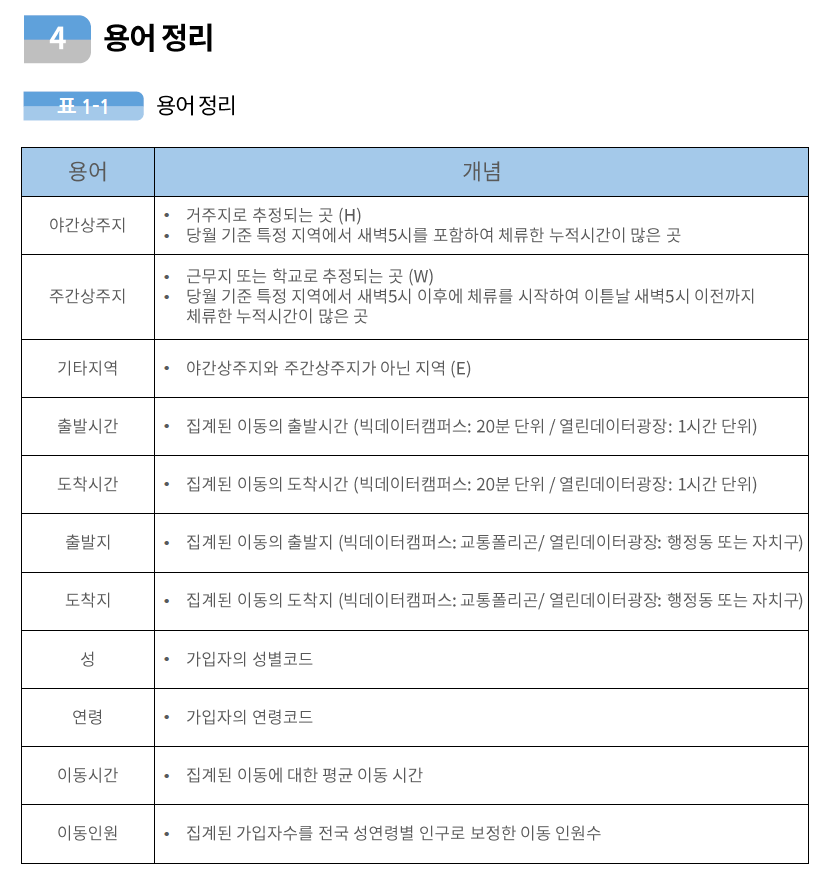

In [ ]:
df_all_2301['이동유형'].unique()

array(['HW', 'WE', 'WH', 'WW', 'EW'], dtype=object)

In [ ]:
df_all_2301 = df_all_2301[df_all_2301['이동유형'].str.contains('W')]

In [ ]:
df_all_2301.head(100)

,대상연월,요일,도착시간,출발_시군구_코드,도착_시군구_코드,성별,나이,이동유형,평균_이동_시간(분),이동인구(합),도착유형
4,202301,일,18,11010,11010,M,45,HW,24,34.55,W
5,202301,일,18,11010,11010,M,45,WE,21,37.94,E
6,202301,일,18,11010,11010,M,45,WH,33,201.01,H
7,202301,일,18,11010,11010,M,45,WW,19,56.99,W
10,202301,일,18,11010,11010,M,50,EW,29,91.36,W
...,...,...,...,...,...,...,...,...,...,...,...
406,202301,일,18,11010,11020,F,35,WE,26,15.04,E
407,202301,일,18,11010,11020,F,35,WH,25,30.12,H
408,202301,일,18,11010,11020,F,35,WW,21,12.00,W
411,202301,일,18,11010,11020,F,40,EW,12,9.48,W


In [ ]:
df_all_2301['도착유형'] = df_all_2301['이동유형'].str[-1]

In [ ]:
df_all_2301['나이'].unique()

array([45, 50, 55, 25, 30, 35, 40])

In [ ]:
df_all_2301 = df_all_2301[(df_all_2301.나이 > 20)&(df_all_2301. 나이 < 60)]

In [ ]:
df_all_2301 .head(100)

,대상연월,요일,도착시간,출발_시군구_코드,도착_시군구_코드,성별,나이,이동유형,평균_이동_시간(분),이동인구(합),도착유형
4,202301,일,18,11010,11010,M,45,HW,24,34.55,W
5,202301,일,18,11010,11010,M,45,WE,21,37.94,E
6,202301,일,18,11010,11010,M,45,WH,33,201.01,H
7,202301,일,18,11010,11010,M,45,WW,19,56.99,W
10,202301,일,18,11010,11010,M,50,EW,29,91.36,W
...,...,...,...,...,...,...,...,...,...,...,...
406,202301,일,18,11010,11020,F,35,WE,26,15.04,E
407,202301,일,18,11010,11020,F,35,WH,25,30.12,H
408,202301,일,18,11010,11020,F,35,WW,21,12.00,W
411,202301,일,18,11010,11020,F,40,EW,12,9.48,W


In [ ]:
df_all_2301.groupby(['도착유형', '나이'])['이동인구(합)'].mean()

TypeError: ignored